In [19]:
library(data.table)

In [20]:
sleep = data.table(datasets::sleep)

In [21]:
sub_ = sleep[ ,extra, group ]

In [22]:
sub_[,
    mean(x = extra), by=group
]

group,V1
<fct>,<dbl>
1,0.75
2,2.33


In [23]:
sub_[,
    .N, by=group
]

group,N
<fct>,<int>
1,10
2,10


In [42]:
sub_[
    , group := as.numeric(lapply(group, function(x){
        if (x == 1) return(0)
        else return(1)
    }))
]
sub_

group,extra
<dbl>,<dbl>
0,0.7
0,-1.6
0,-0.2
0,-1.2
0,-0.1
0,3.4
0,3.7
0,0.8
0,0.0


In [53]:
model_ = glm(
    sub_[, group] ~ sub_[, extra], family = "gaussian"
)

In [54]:
model_


Call:  glm(formula = sub_[, group] ~ sub_[, extra], family = "gaussian")

Coefficients:
  (Intercept)  sub_[, extra]  
       0.3428         0.1021  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    5 
Residual Deviance: 4.193 	AIC: 31.51

In [55]:
summary(model_)


Call:
glm(formula = sub_[, group] ~ sub_[, extra], family = "gaussian")

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    0.34275    0.13707   2.500   0.0223 *
sub_[, extra]  0.10211    0.05487   1.861   0.0792 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2329631)

    Null deviance: 5.0000  on 19  degrees of freedom
Residual deviance: 4.1933  on 18  degrees of freedom
AIC: 31.513

Number of Fisher Scoring iterations: 2


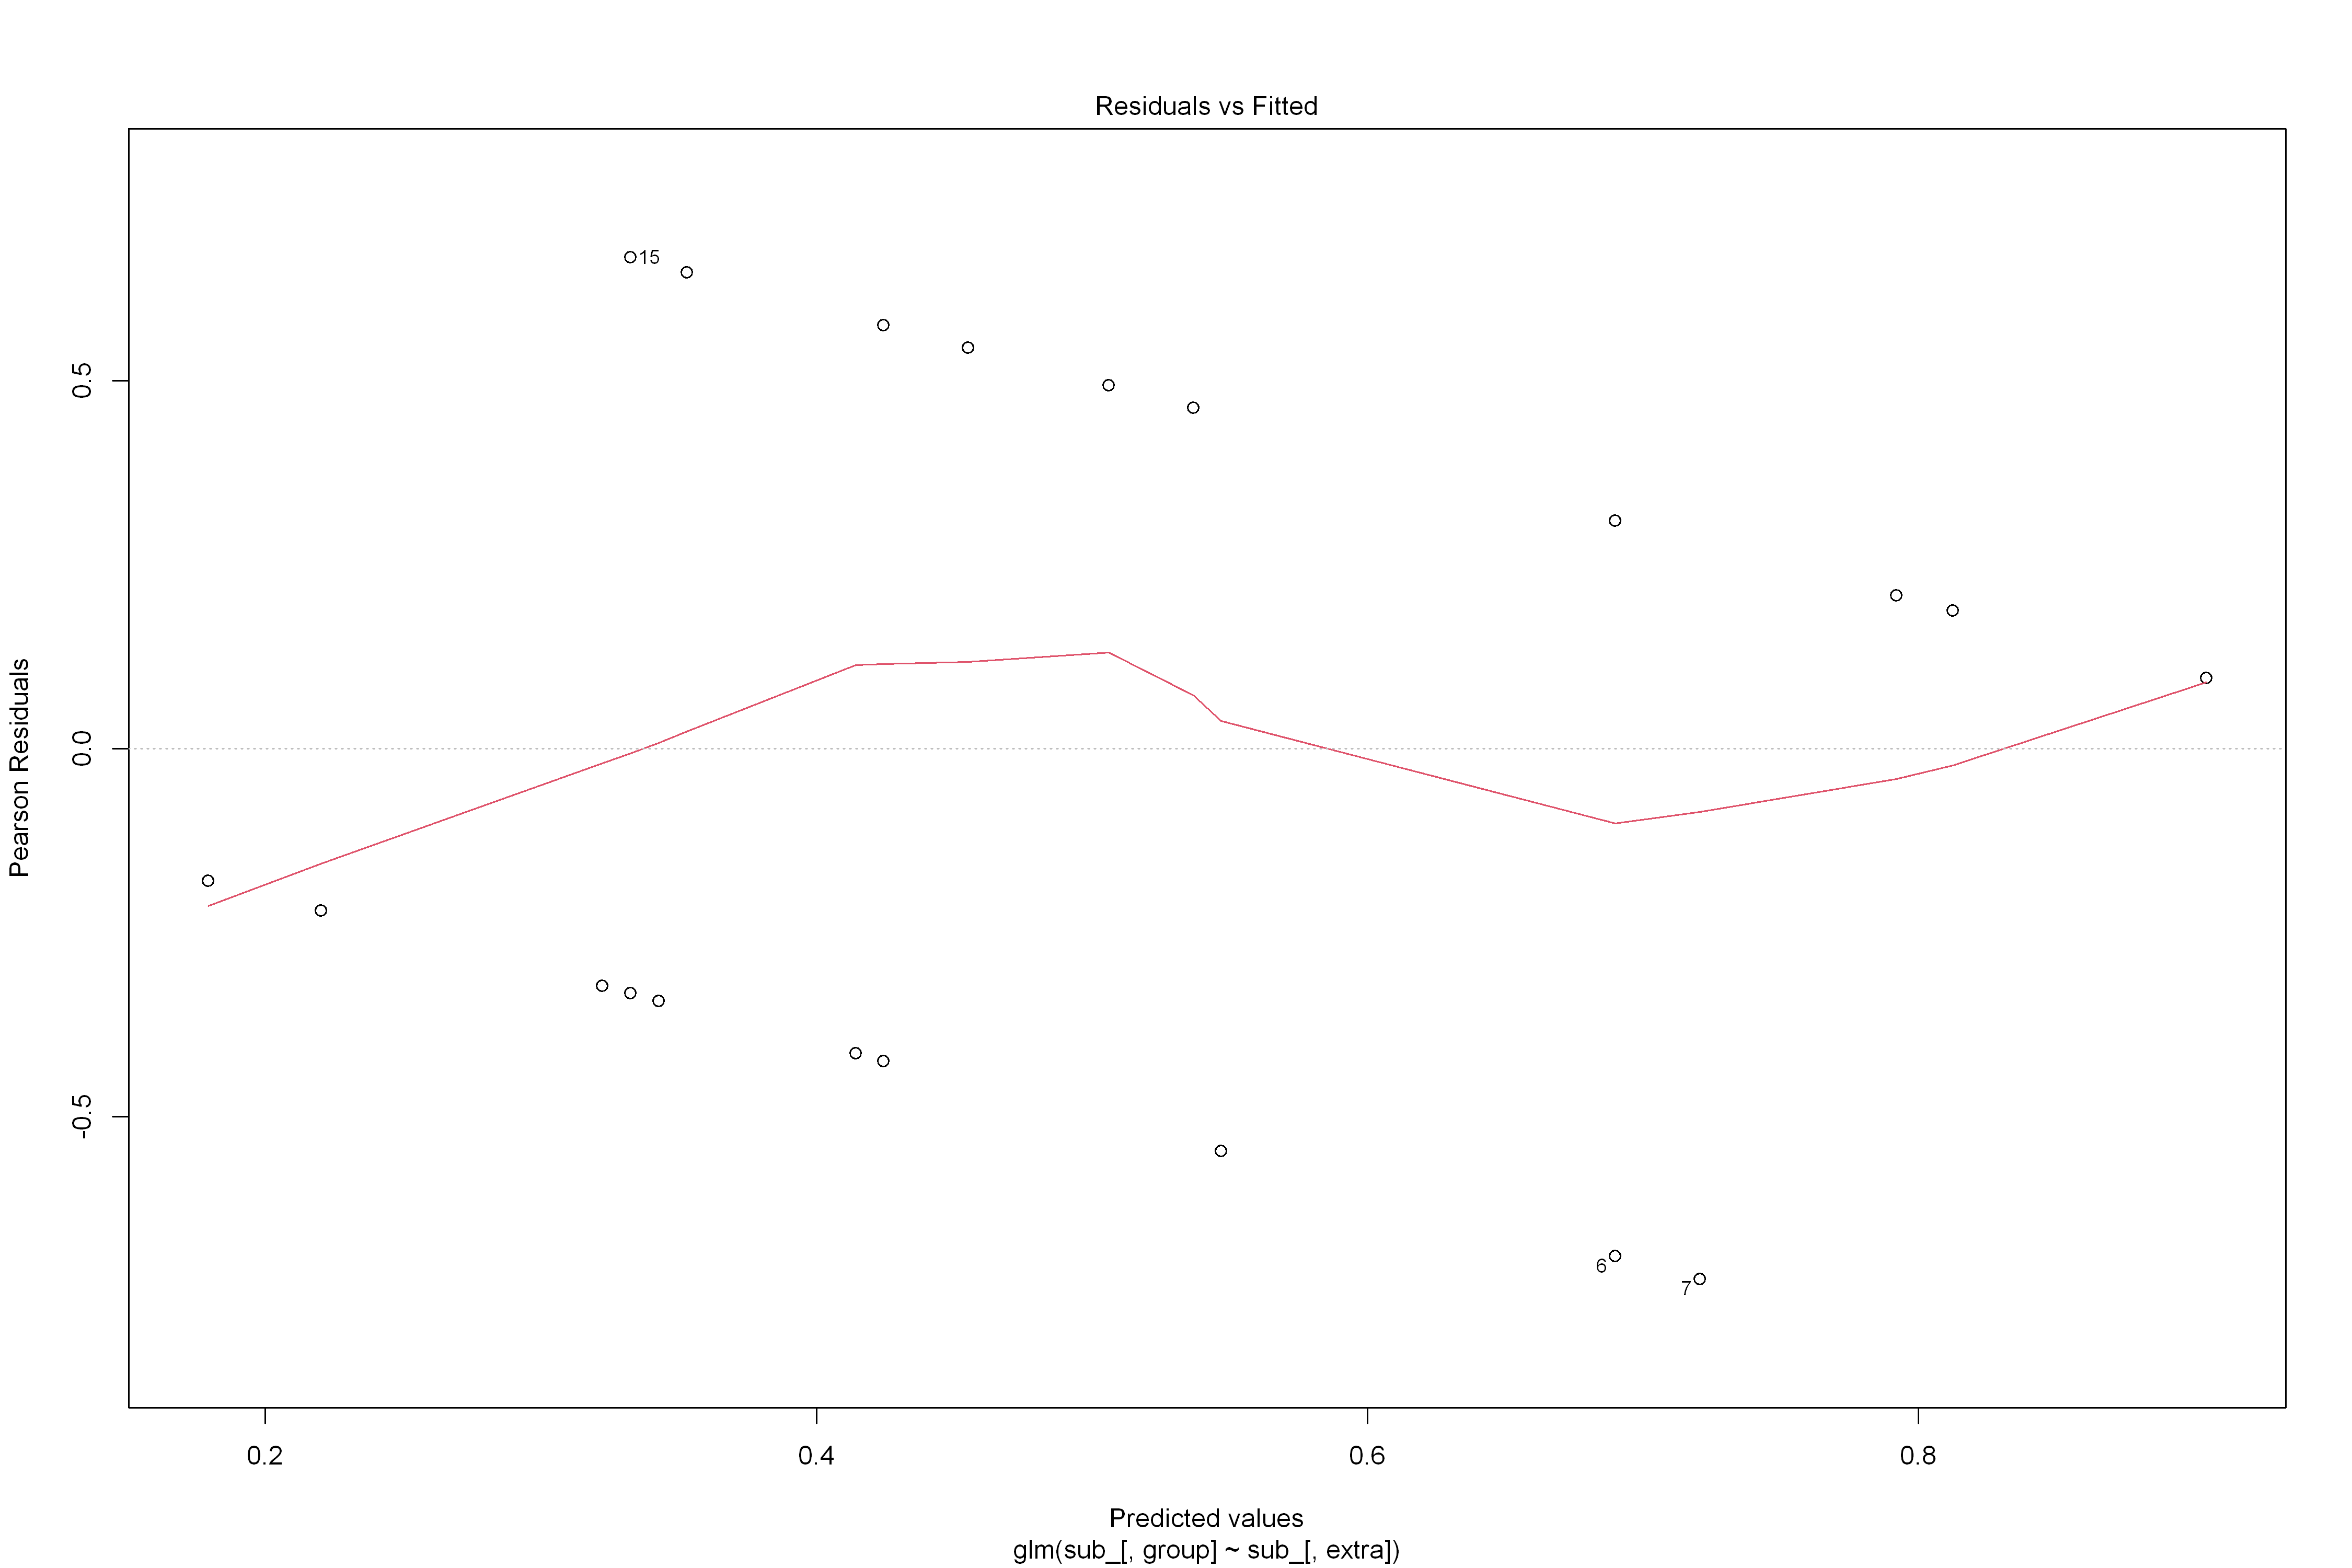

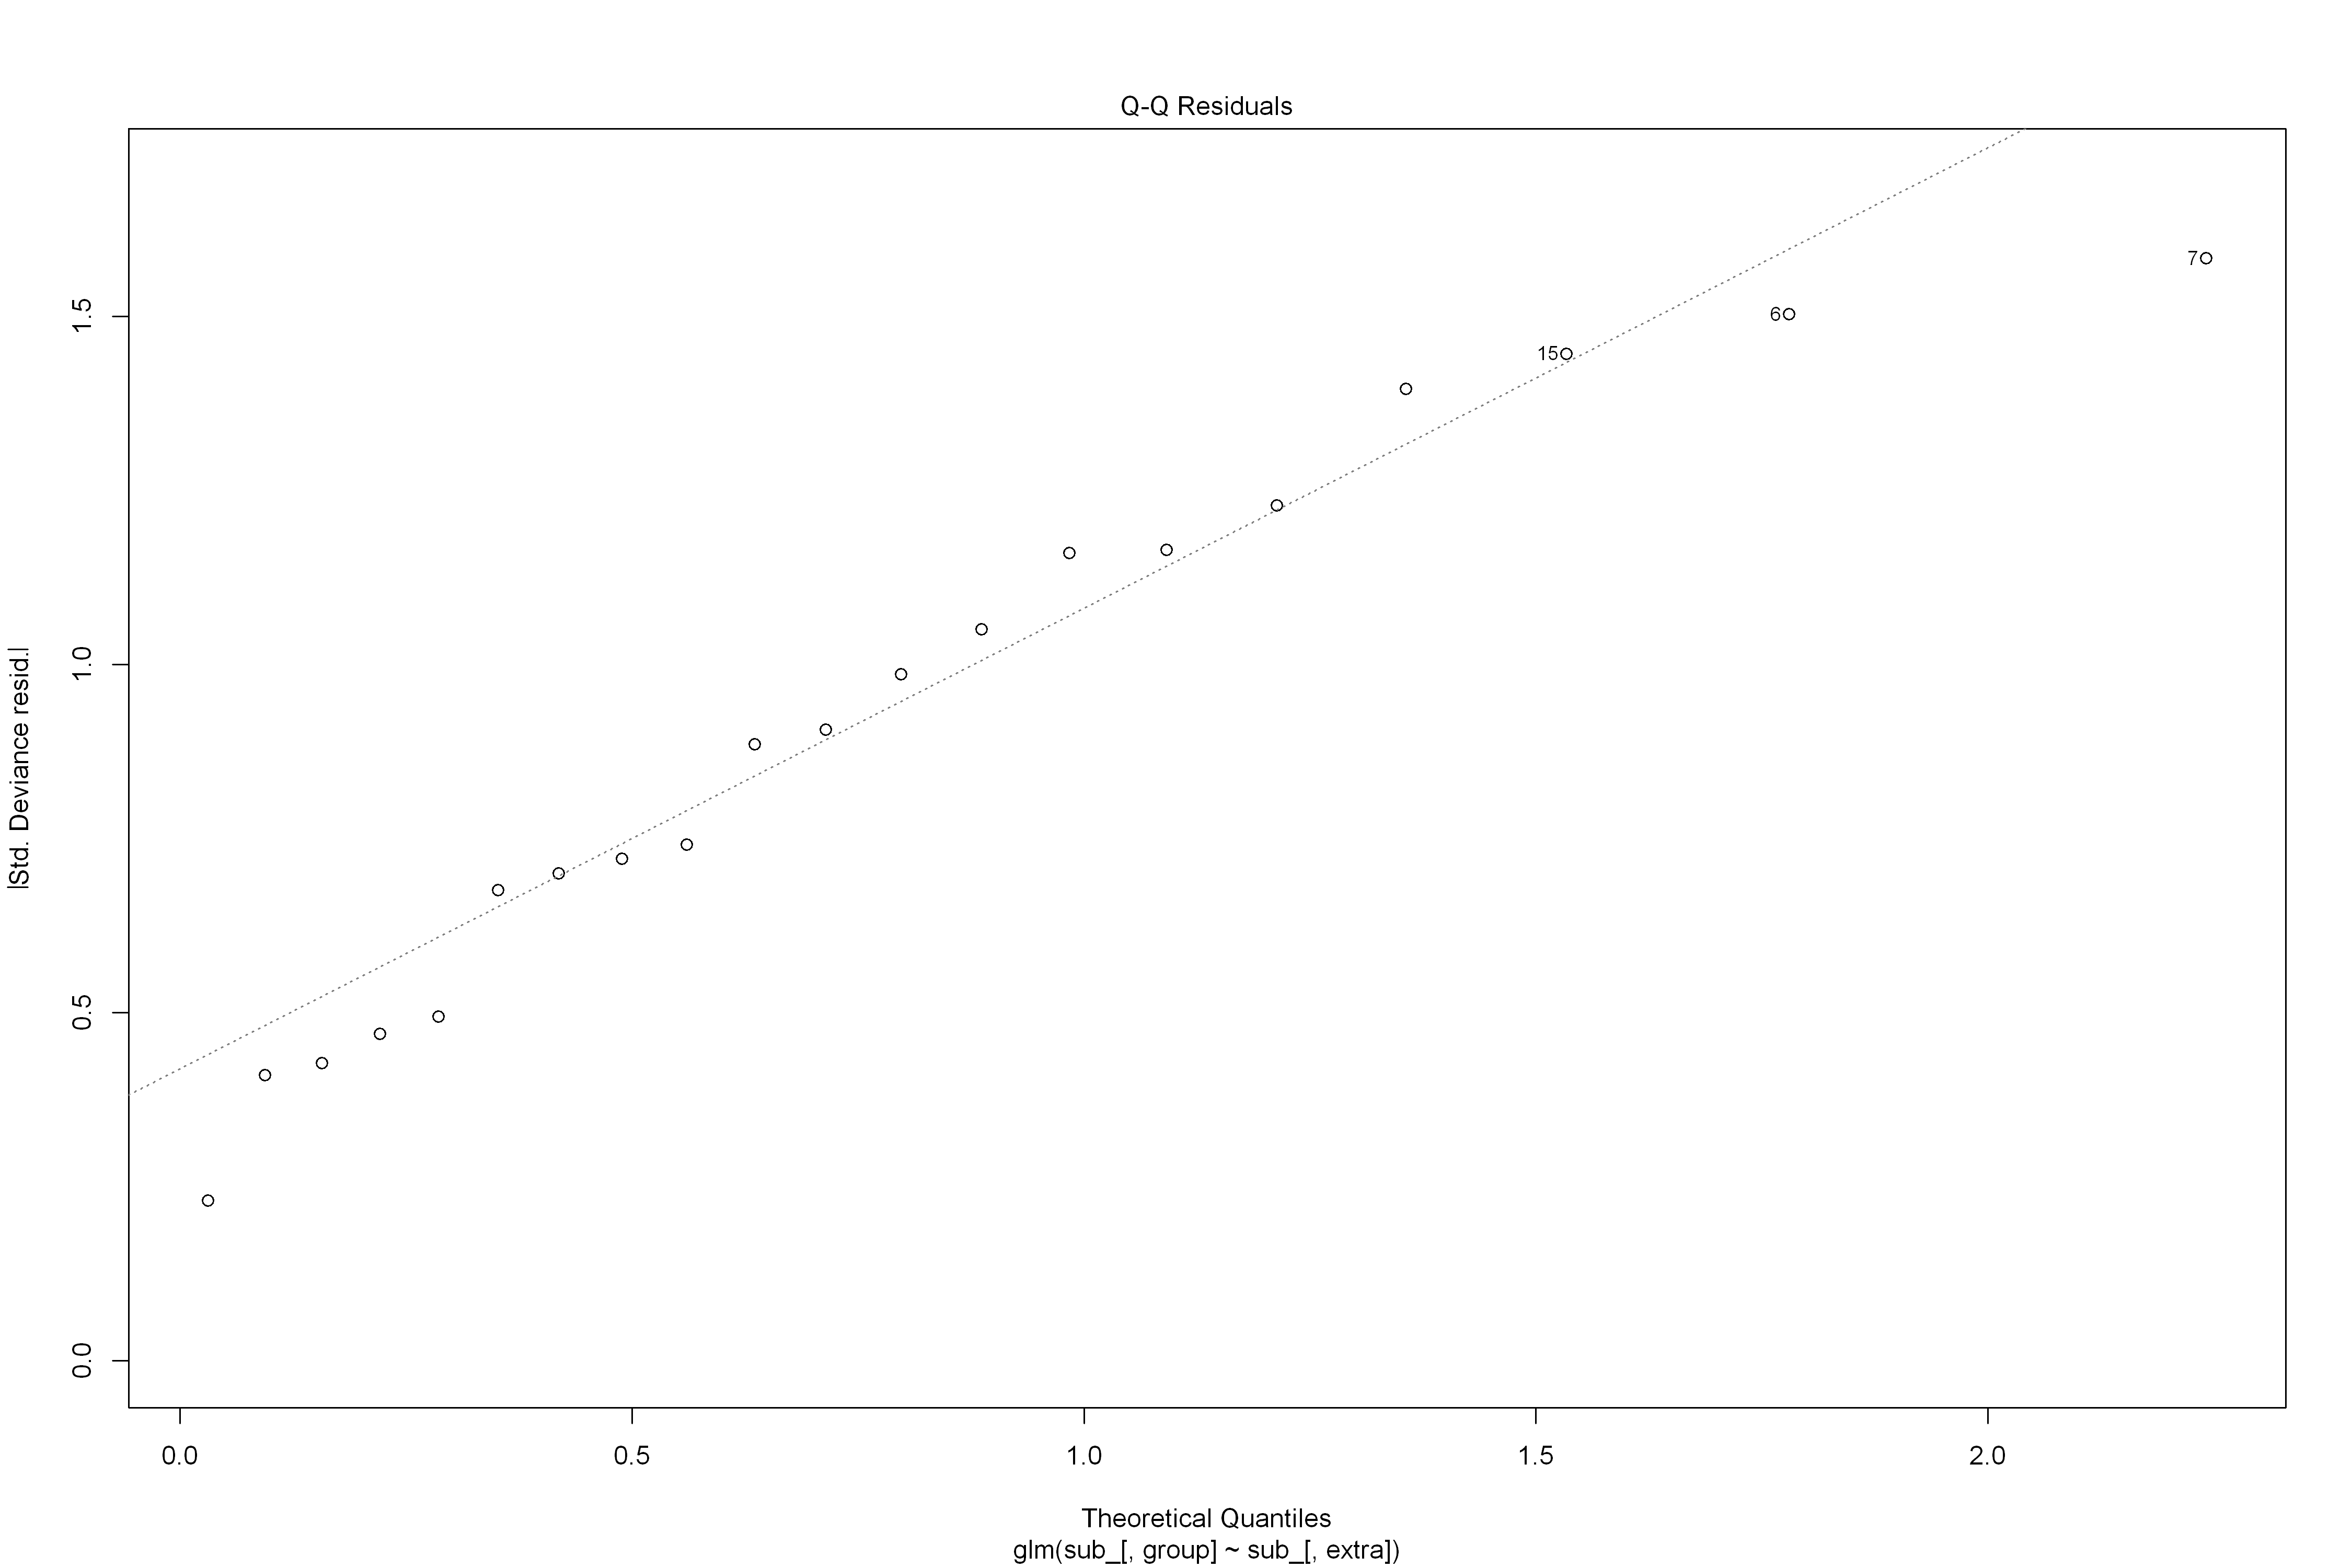

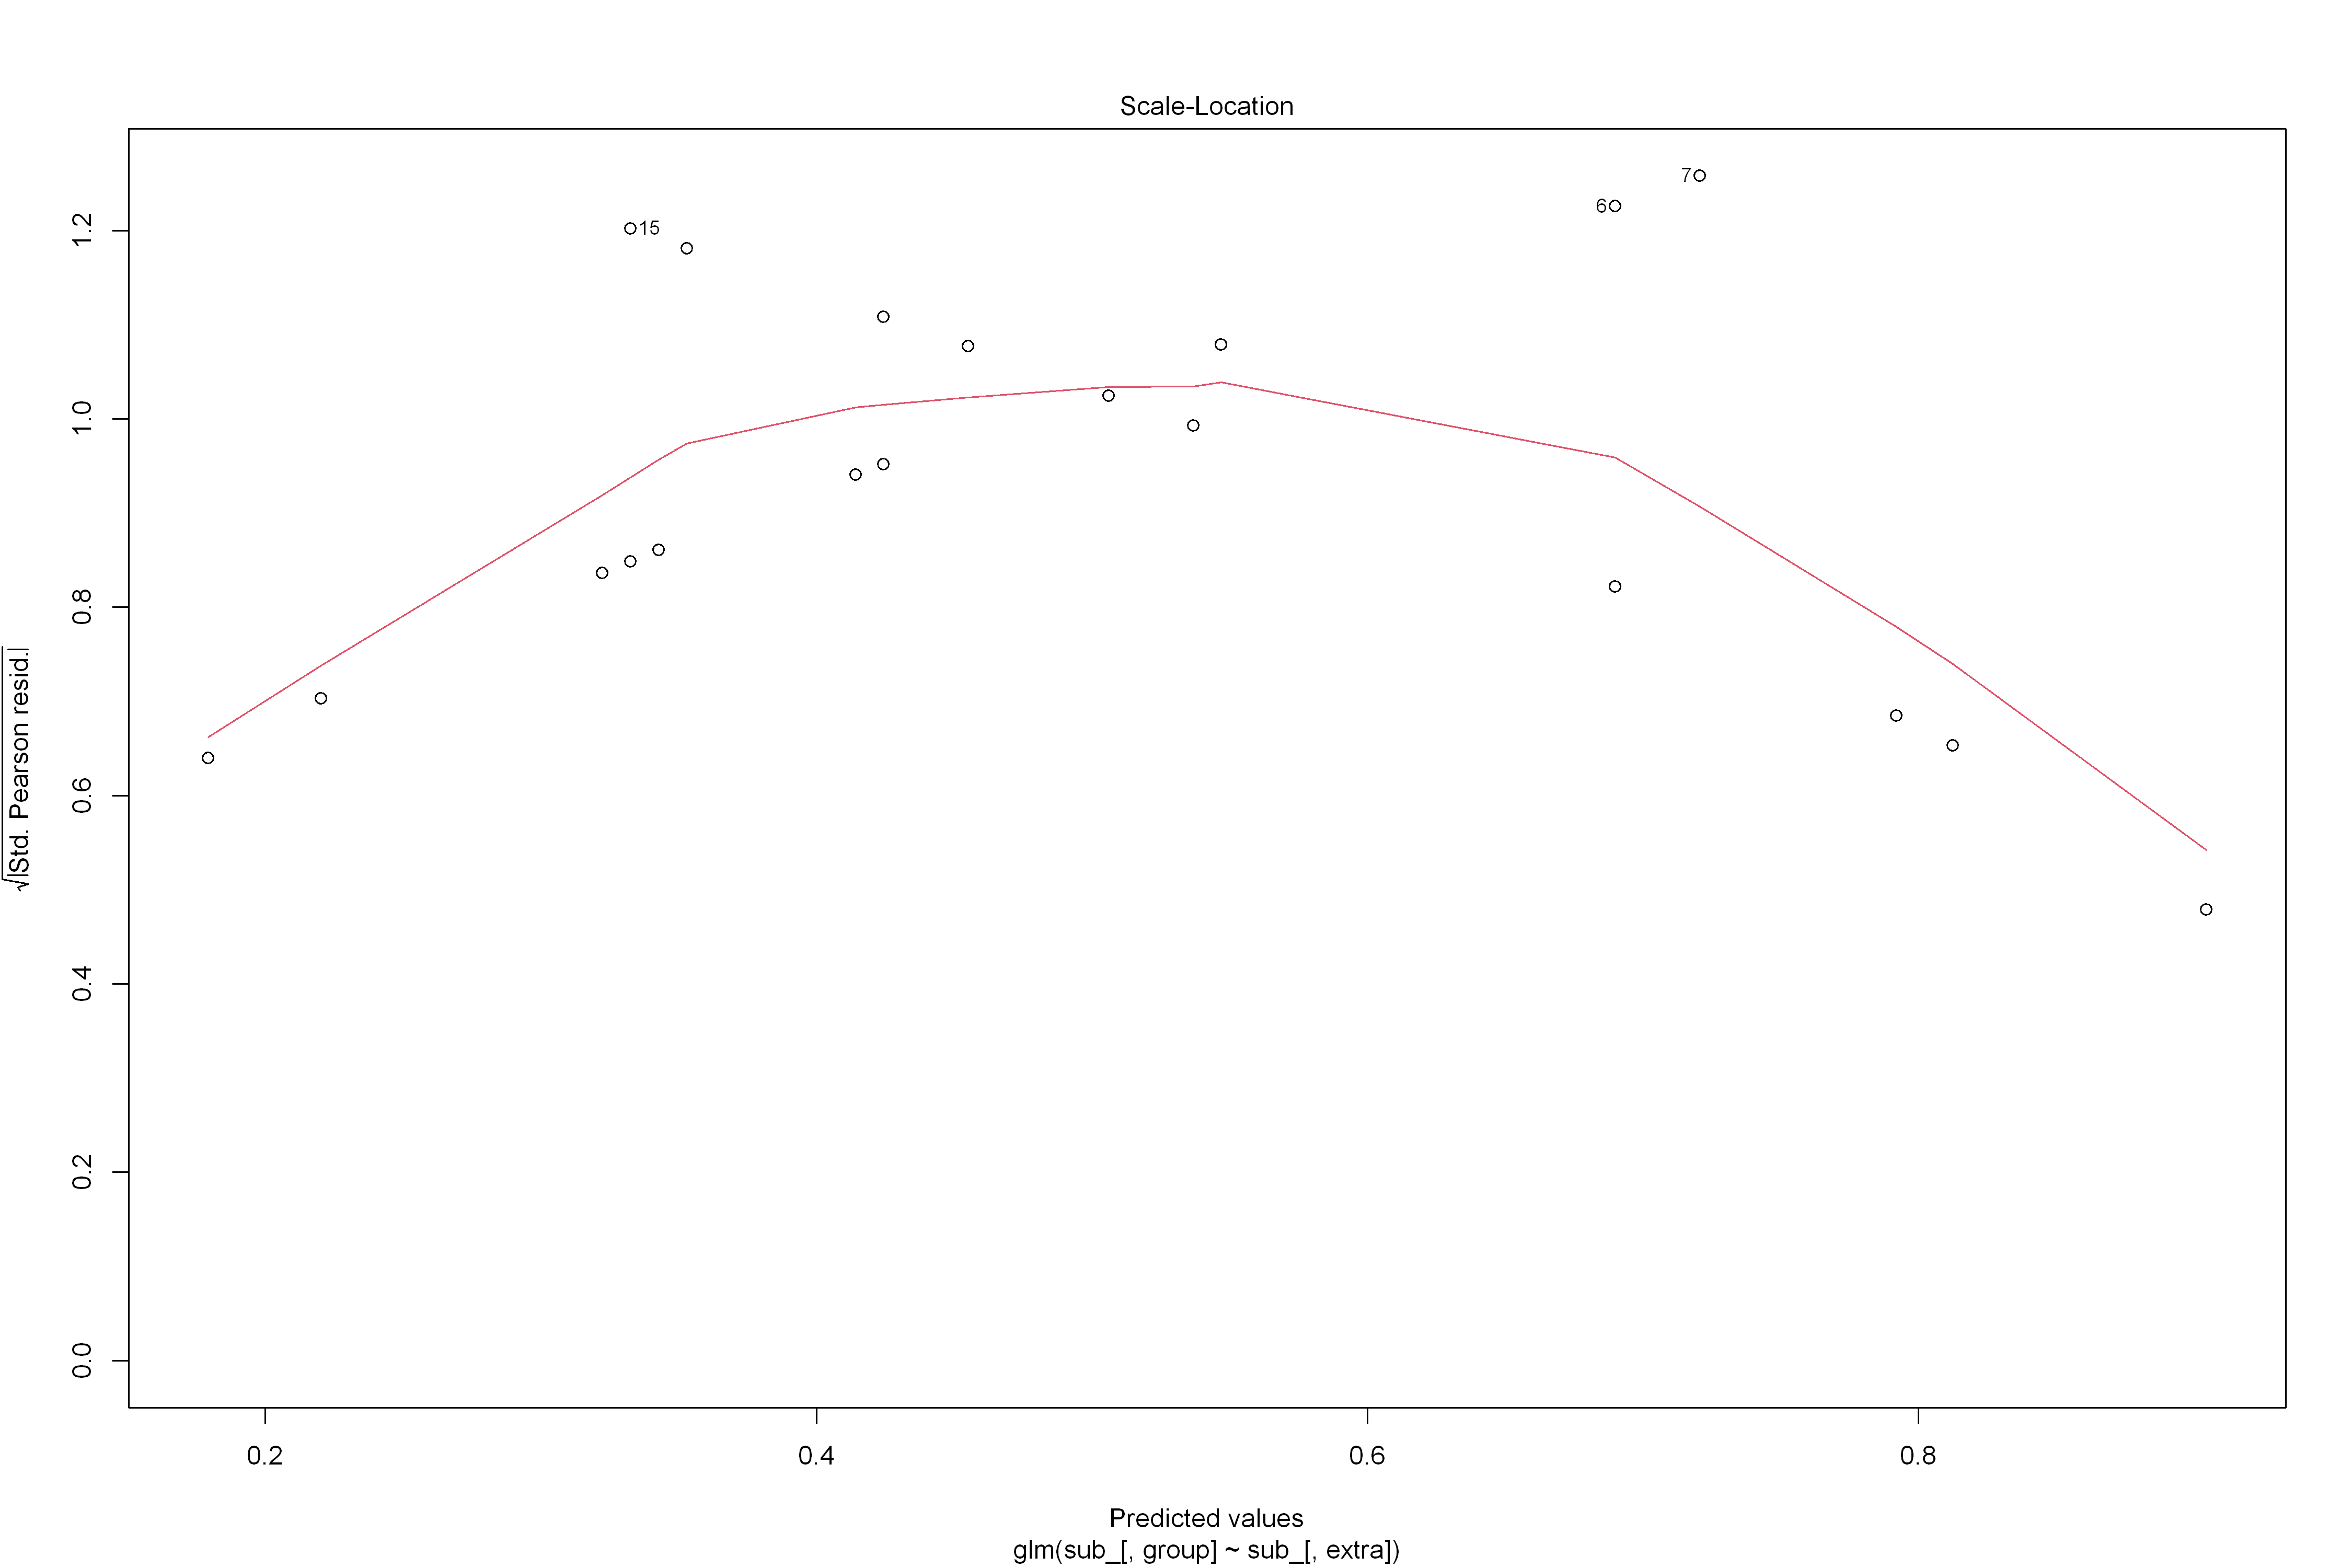

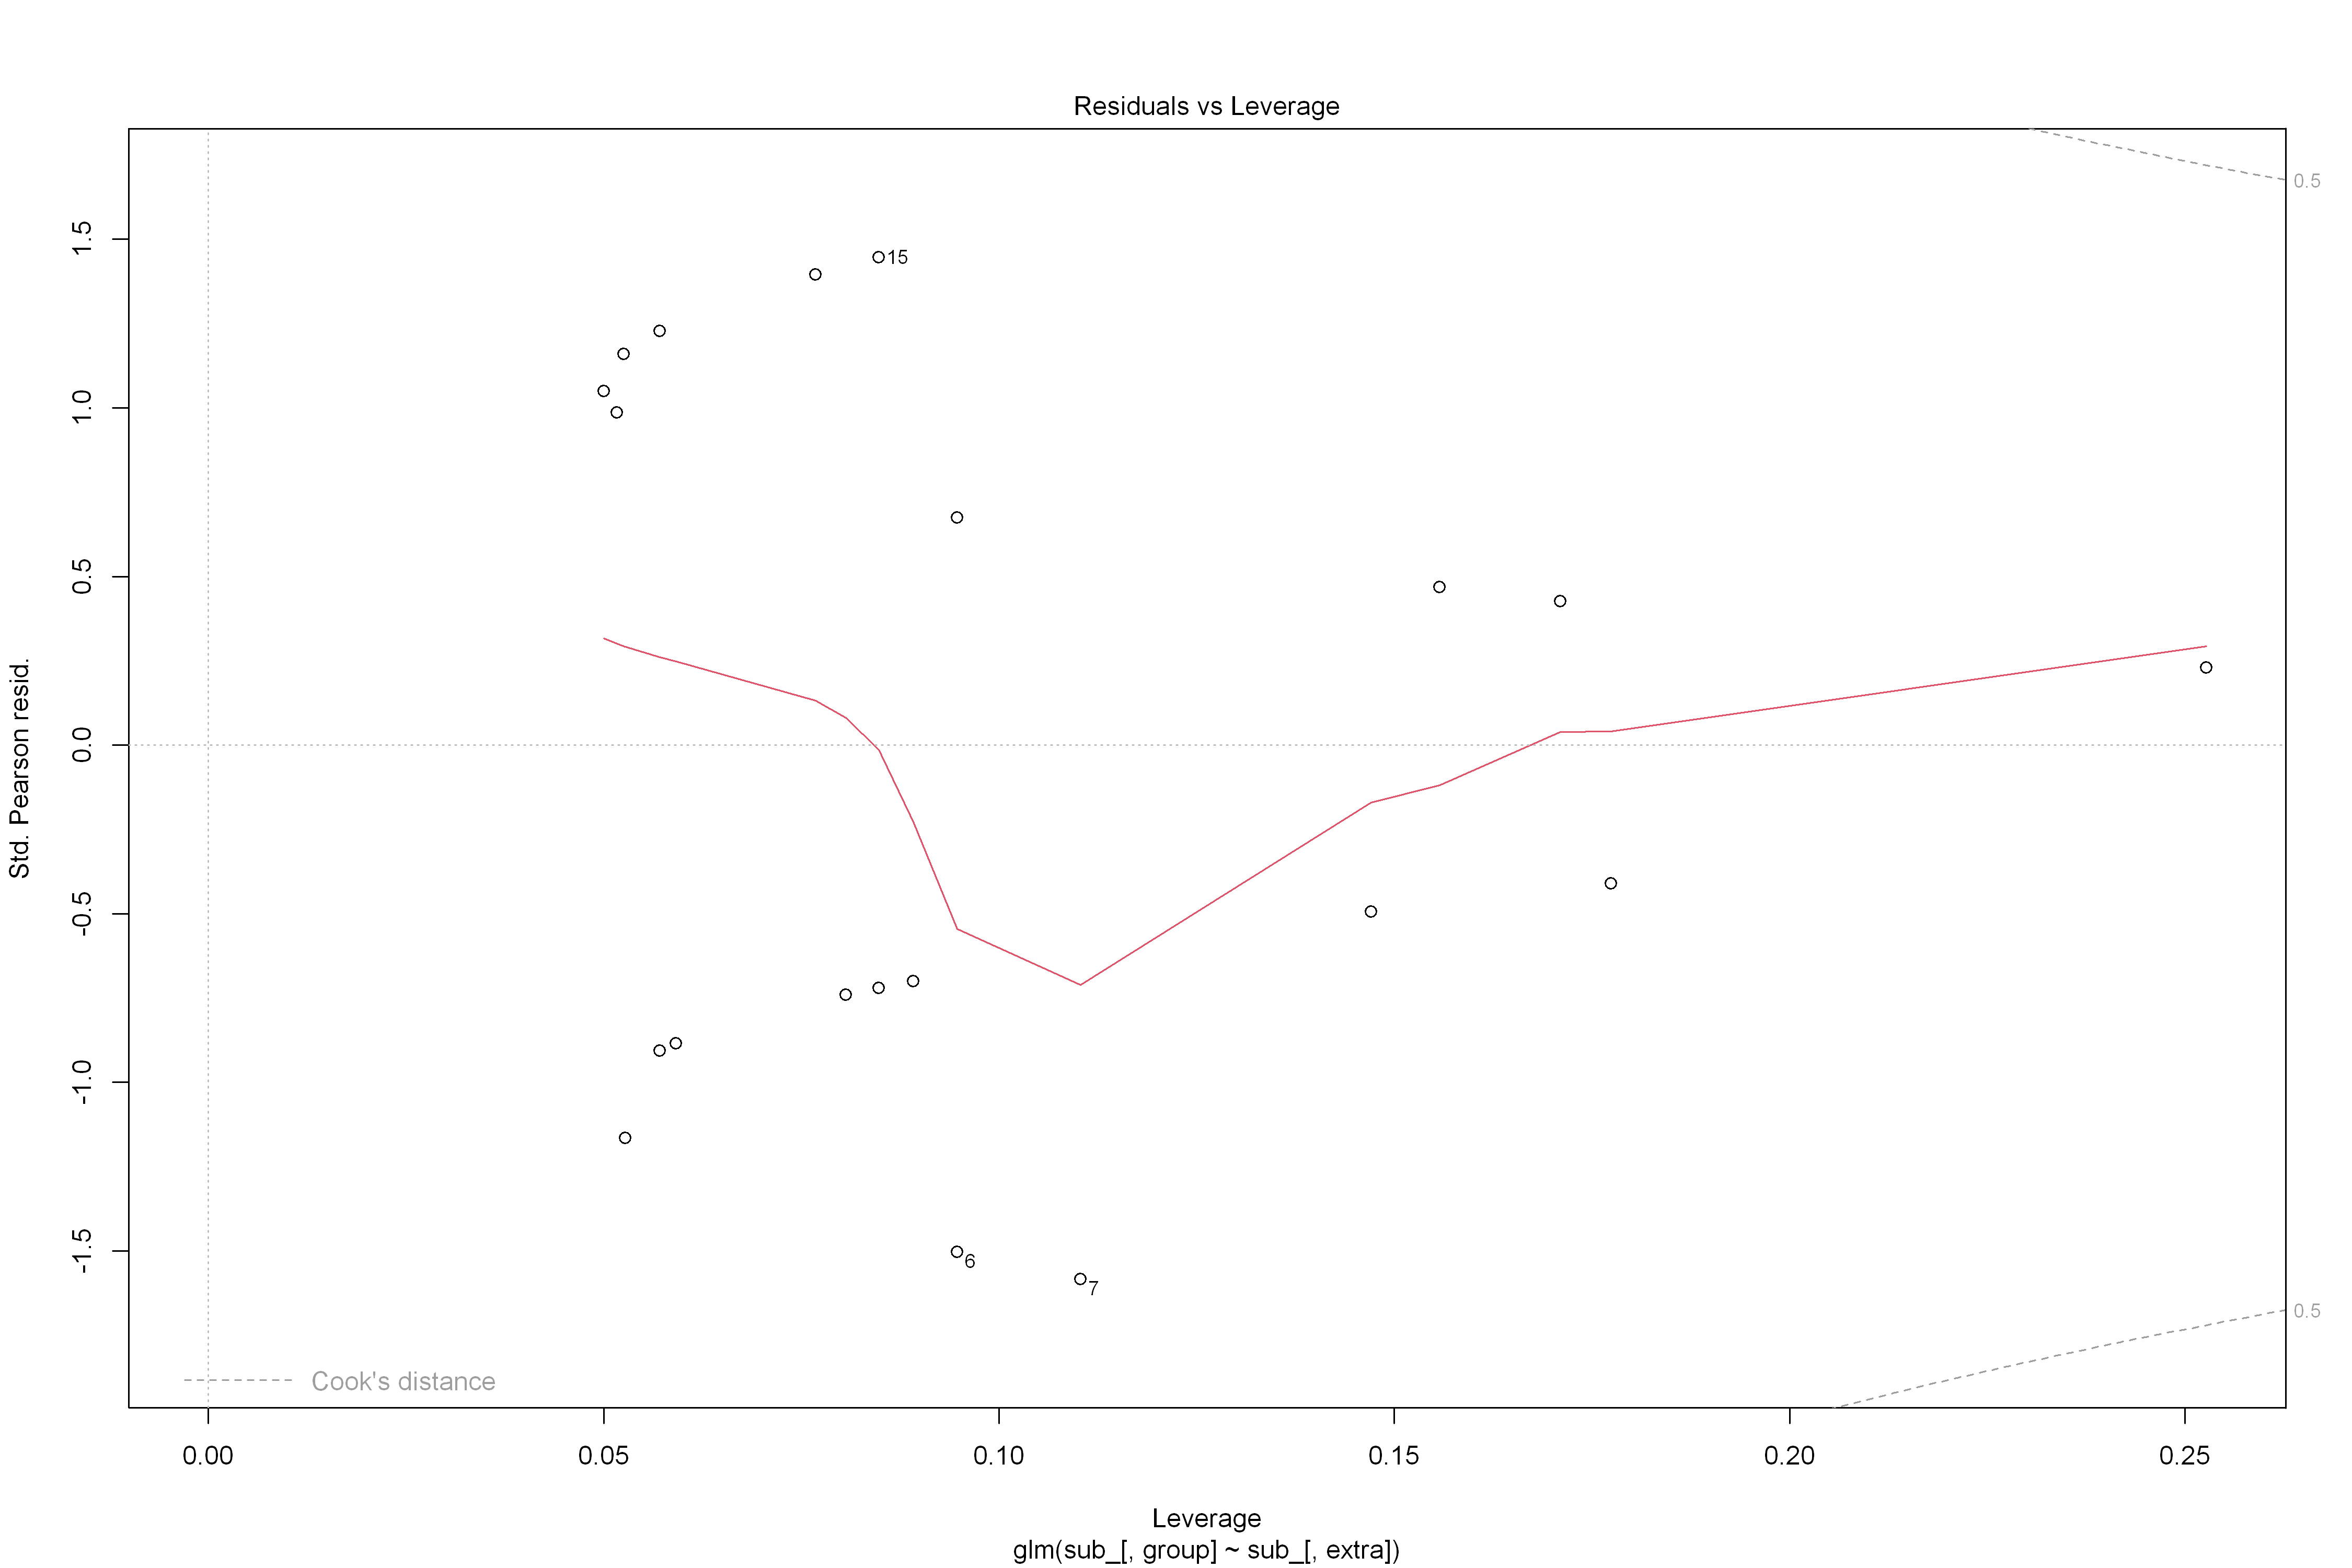

In [56]:
par(bg = "white")
options(reps.plot.width=100)
plot(model_)